In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [33]:
# Getting the data
housing = pd.read_csv('https://github.com/otubrempong/Hands-on-Machine-Learning-Training-With-Python/raw/refs/heads/main/Datasets/housing.csv')

In [4]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


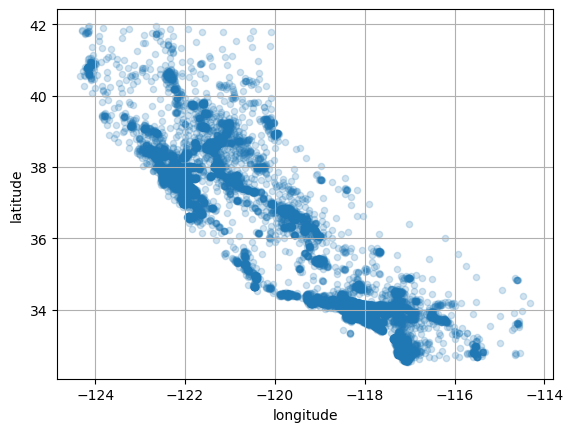

In [7]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2, grid=True)
plt.show()

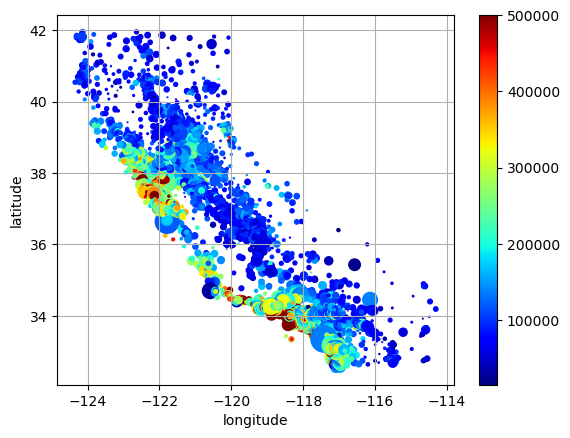

In [8]:
housing.plot(kind='scatter', x='longitude',y='latitude', s=housing['population']/100, 
             colormap='jet', colorbar=True, c=housing['median_house_value'], grid=True)

plt.show()

In [9]:
housing.columns.tolist()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [10]:
housing.drop(columns=['ocean_proximity'], axis=1,inplace=True)


In [11]:

housing_corr = housing.corr()

print(housing_corr)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

In [12]:
# Checking correlation with the target
housing_corr['median_income'].sort_values()

housing_median_age   -0.119034
latitude             -0.079809
longitude            -0.015176
total_bedrooms       -0.007723
population            0.004834
households            0.013033
total_rooms           0.198050
median_house_value    0.688075
median_income         1.000000
Name: median_income, dtype: float64

In [13]:
# Checking correlation with the target with sort in descending
housing_corr['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

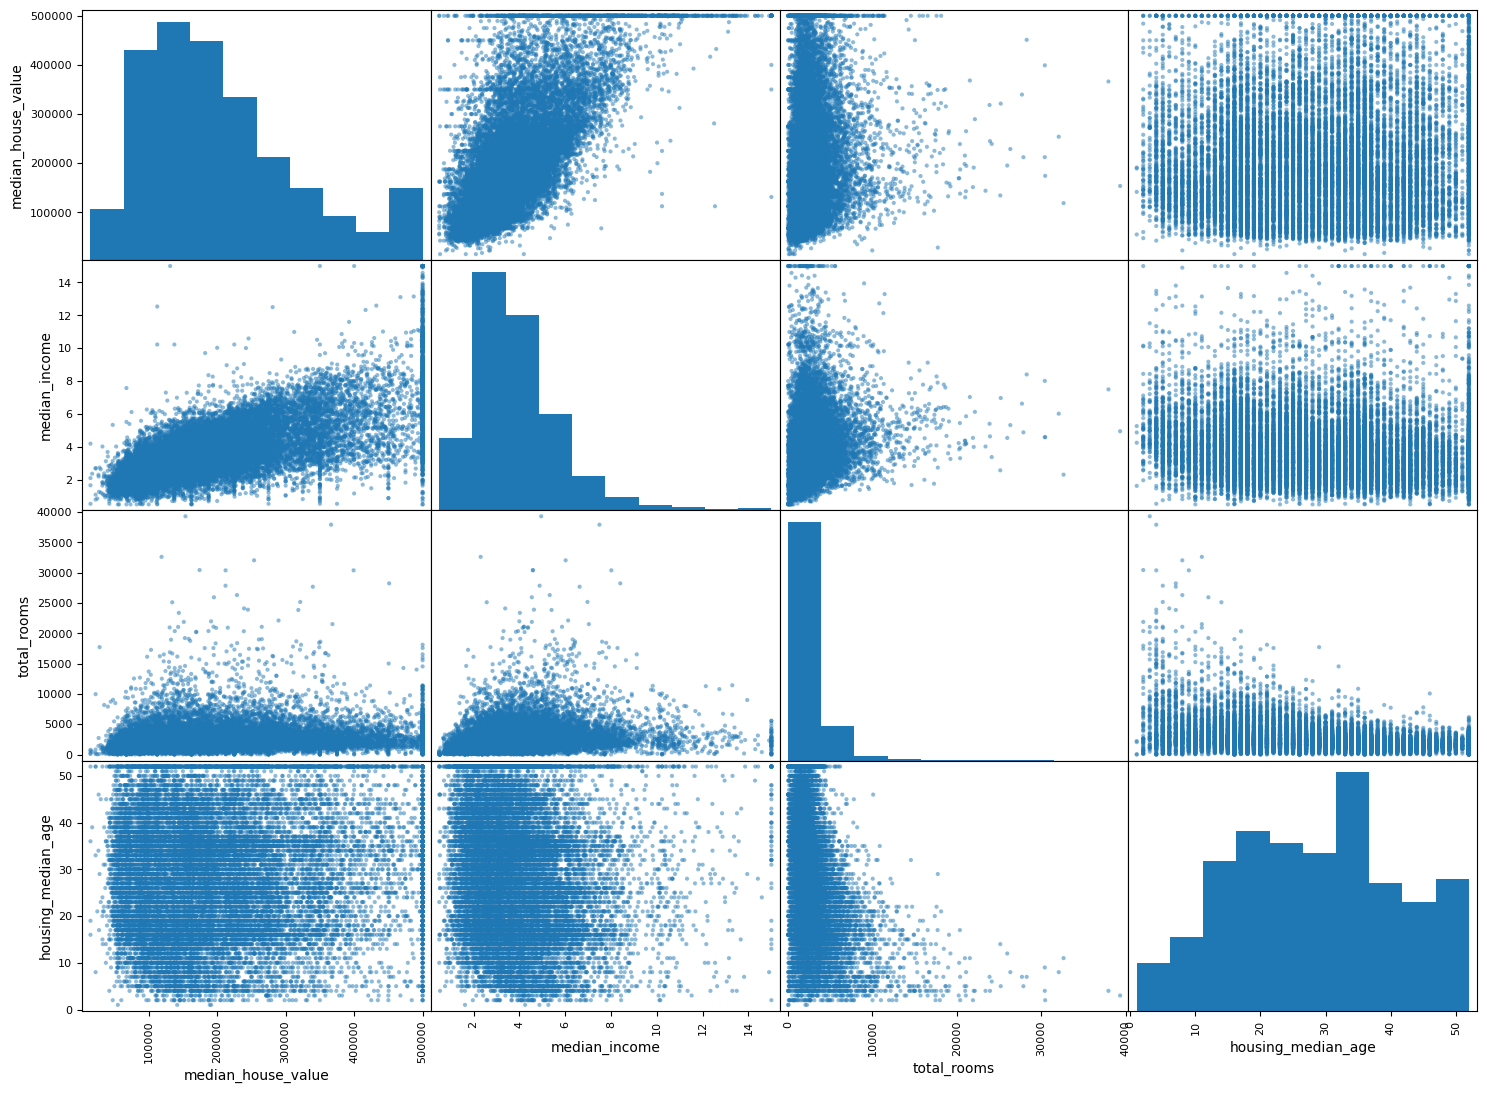

In [14]:
from pandas.plotting import scatter_matrix

# option one: you can drop the categorical feature and plot the rest
# scatter_matrix(housing[housing.drop(columns=['ocean_proximity'], axis=1).columns.tolist()], figsize=(20, 15),
                # grid=True, diagonal='hist')

# option two: you can visualize by listing all the interested features
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]

scatter_matrix(housing[attributes], figsize=(18, 13),
                grid=True)

plt.show()

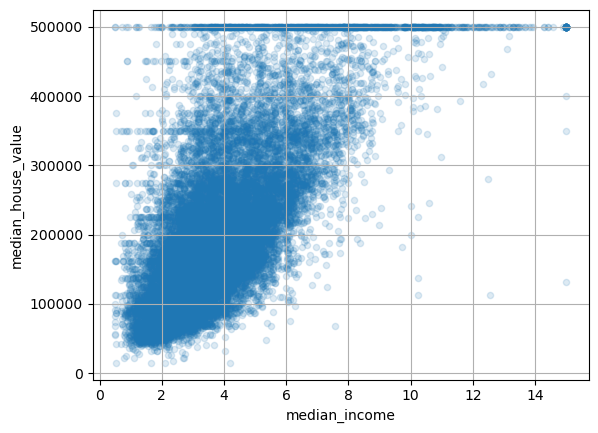

In [15]:
## Visualizing the feature that had a very strong correlation with our target

housing.plot(kind='scatter', x='median_income',
             y='median_house_value', alpha=0.15, grid=True)

plt.show()

In [16]:
housing.columns.tolist()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [ ]:
# feature engineering

housing['rooms_per_house'] = housing['total_rooms'] / housing['households']

housing['bedrooms_ratio'] = housing['total_bedrooms'] / housing['total_rooms']

housing['people_per_house'] = housing['population'] / housing['households']


In [ ]:
## computing the correlation again to see if our new features result in strong correlation
corr_matrix = housing.corr()

corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
rooms_per_house       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
people_per_house     -0.023737
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_ratio       -0.255880
Name: median_house_value, dtype: float64

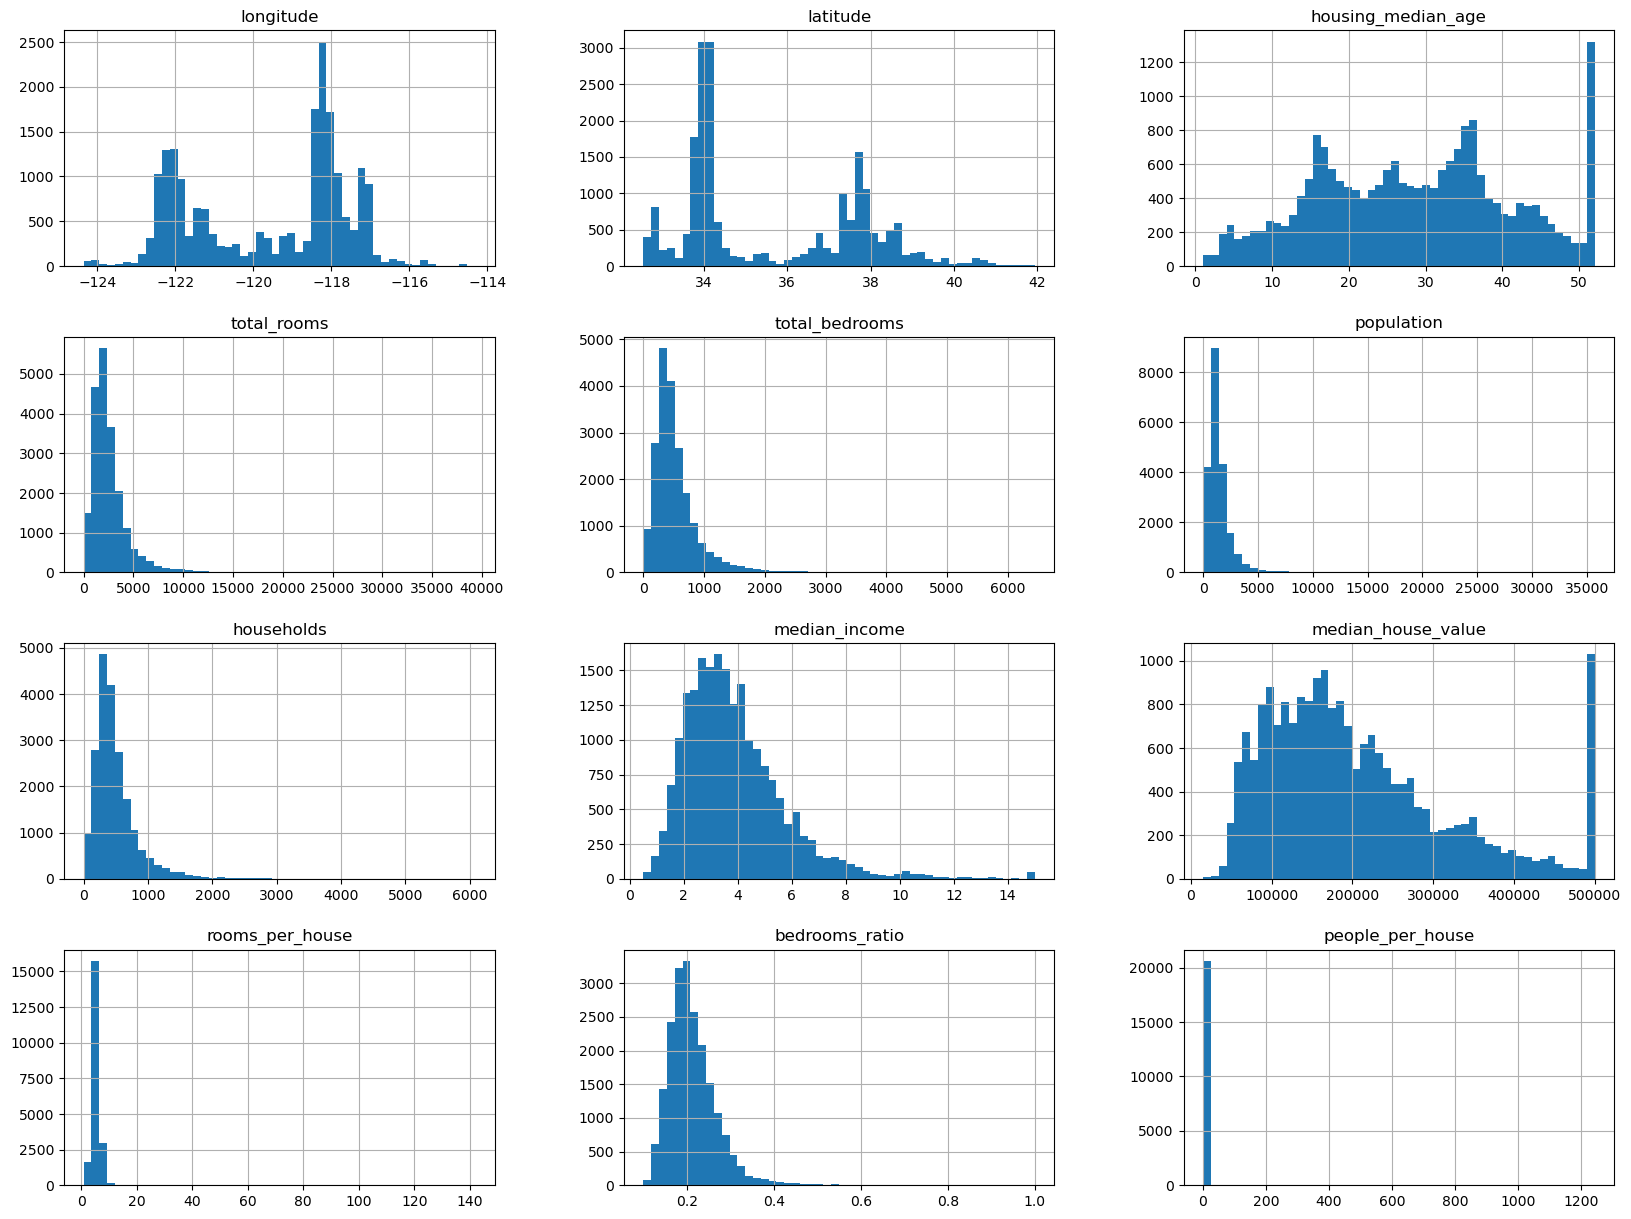

In [ ]:
# checking the distribution of the features

housing.hist(bins=50, figsize=(20, 15))

plt.show()

In [ ]:
# computing the skewness to confirm the distribution
from scipy.stats import skew

housing_skew = housing.skew()

print(housing_skew)

longitude             -0.297801
latitude               0.465953
housing_median_age     0.060331
total_rooms            4.147343
total_bedrooms         3.459546
population             4.935858
households             3.410438
median_income          1.646657
median_house_value     0.977763
rooms_per_house       20.697869
bedrooms_ratio         2.251868
people_per_house      97.639561
dtype: float64


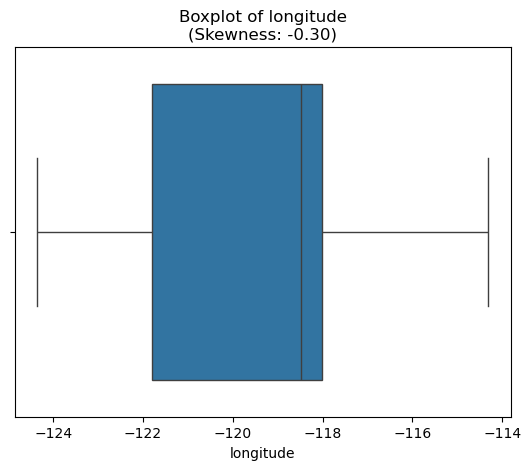

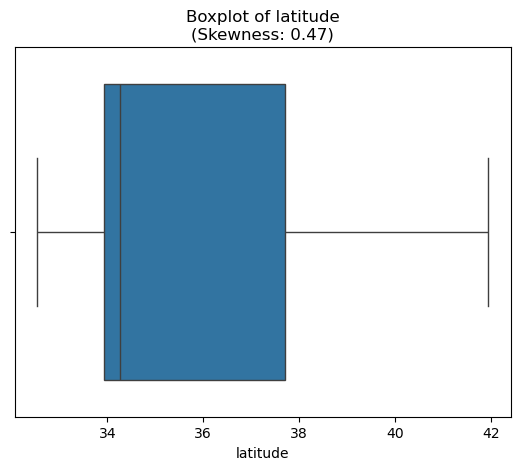

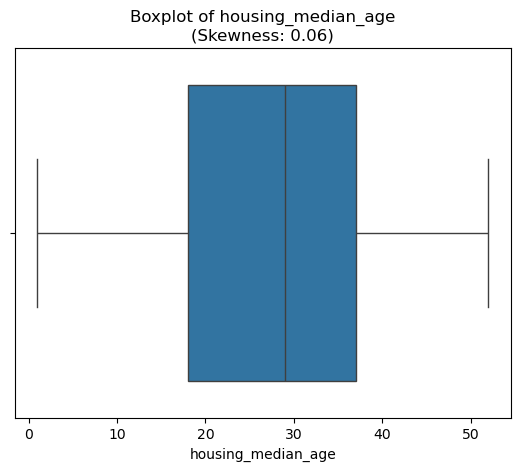

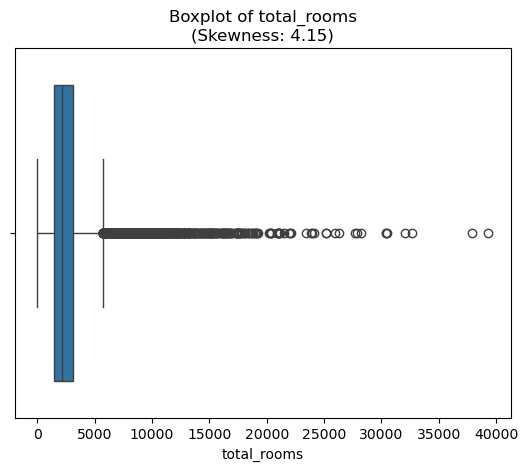

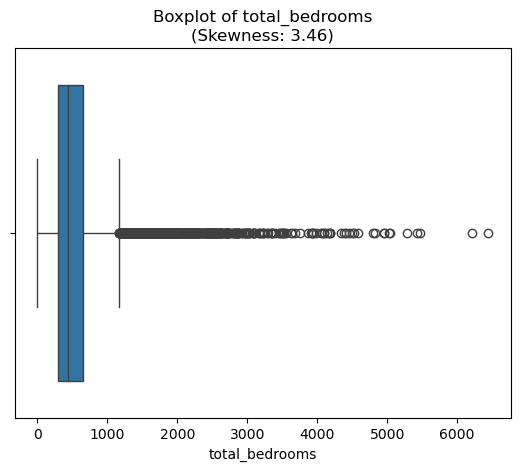

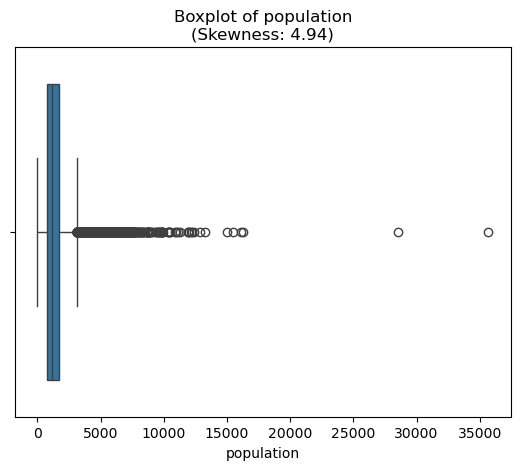

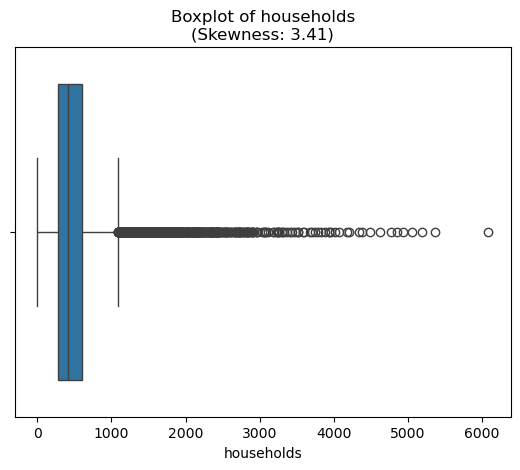

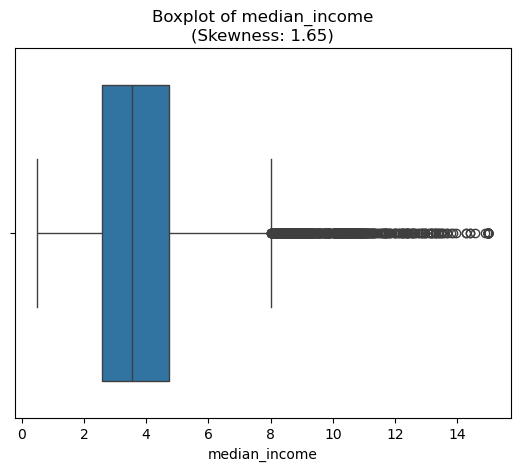

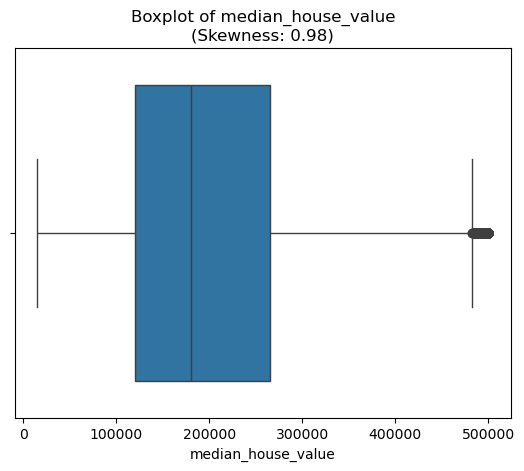

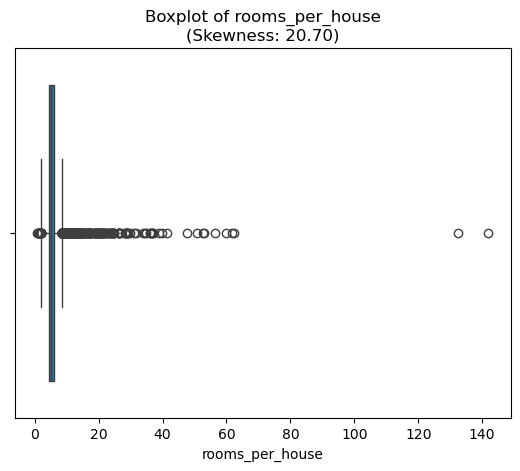

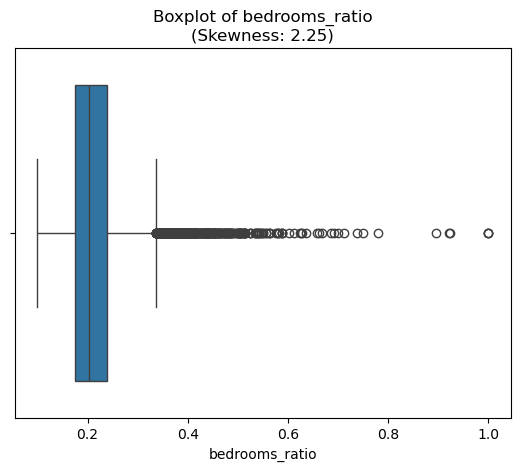

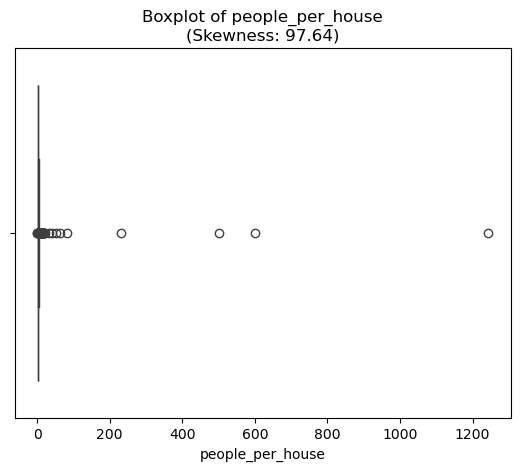

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate and visualize skewness with box plots
for column in housing.columns:
    sns.boxplot(x=housing[column])
    plt.title(f'Boxplot of {column}\n(Skewness: {housing[column].skew():.2f})')
    plt.xlabel(column)
    plt.show()


### Data cleaning

In [22]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   rooms_per_house     20640 non-null  float64
 10  bedrooms_ratio      20433 non-null  float64
 11  people_per_house    20640 non-null  float64
dtypes: float64(12)
memory usage: 1.9 MB


In [24]:
print(housing['total_bedrooms'].isna().value_counts())

housing[housing.columns.tolist()].isna().value_counts()

total_bedrooms
False    20433
True       207
Name: count, dtype: int64


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value  rooms_per_house  bedrooms_ratio  people_per_house
False      False     False               False        False           False       False       False          False               False            False           False               20433
                                                      True            False       False       False          False               False            True            False                 207
Name: count, dtype: int64

In [ ]:
## First option --> Imputation

# dropna, drop, fillna can be used as well.

median = housing['total_bedrooms'].median()

housing["total_bedrooms"].fillna(median, inplace=True)

In [25]:
# another option --> simpleinputer

from sklearn.impute import SimpleImputer

impute = SimpleImputer(strategy="median")

housing_num = housing.select_dtypes(include=[np.number])

impute.fit(housing_num)

SimpleImputer(strategy='median')

In [26]:
impute.statistics_

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  5.22912879e+00,  2.03162434e-01,  2.81811565e+00])

In [27]:
X = impute.transform(housing_num)

In [28]:
housing_num.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_house', 'bedrooms_ratio',
       'people_per_house'],
      dtype='object')

In [29]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

### Handling text and categorical attributes

In [36]:
from sklearn.preprocessing import OrdinalEncoder


In [37]:
housing_cat = housing[["ocean_proximity"]]

housing_cat.head(10)

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY
8,NEAR BAY
9,NEAR BAY


In [39]:
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          9136
INLAND             6551
NEAR OCEAN         2658
NEAR BAY           2290
ISLAND                5
Name: count, dtype: int64

In [ ]:
ordinal_encoder = OrdinalEncoder()

housing_cat_encoded = ordinal_encoder.fit(housing_cat)

In [ ]:
ordinal_encoder.categories_

## this works well for categories in order

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
onehot_encoder = OneHotEncoder()

housing_cat_1hot = onehot_encoder.fit_transform(housing_cat)

housing_cat_1hot.toarray()